In [97]:
#bibliotecas de análise
import pandas as pd
import numpy as np

#pacotes para gráficos
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

#pacote para clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.model_selection import train_test_split

#pacote para realização do PCA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

#pacote para arvore de decião
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#pacotes para o randon florest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [98]:
df = pd.read_csv('../Scripts/df_minerais_ML.csv', header = 0)

In [99]:
df.describe()

,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Molar Mass,Molar Volume,Calculated Density,Hydrated Water
count,451.000000,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,2.796009,-3.150966e-17,5.809593e-17,-3.938707e-18,-4.529513e-17,1.575483e-17,7.089673e-17,2.560160e-17,6.400399e-18,1.969353e-17,-3.544836e-17
std,1.456962,1.001110e+00,1.001110e+00,1.001110e+00,1.001110e+00,1.001110e+00,1.001110e+00,1.001110e+00,1.001110e+00,1.001110e+00,1.001110e+00
min,0.000000,-1.753114e+00,-1.685064e+00,-1.960525e+00,-4.352961e+00,-2.900079e+00,-1.720125e-01,-9.434917e-01,-8.116730e-01,-1.523495e+00,-2.984785e-01
25%,2.000000,-8.995215e-01,-1.277610e-01,-6.383345e-01,-6.627629e-01,-5.807606e-01,-1.720125e-01,-6.117099e-01,-6.022596e-01,-7.453984e-01,-2.984785e-01
50%,2.000000,-1.881942e-01,-1.277610e-01,-1.948283e-01,5.673032e-01,-2.808487e-01,-1.720125e-01,-2.903366e-01,-2.918640e-01,-2.477887e-01,-2.984785e-01
75%,4.000000,8.076640e-01,6.508907e-01,3.727765e-01,5.673032e-01,2.210038e-01,-1.720125e-01,2.224389e-01,2.257280e-01,5.184388e-01,-2.984785e-01
max,6.000000,2.799380e+00,1.429542e+00,3.478153e+00,5.673032e-01,6.673107e+00,1.185422e+01,7.765846e+00,1.027080e+01,3.318566e+00,8.927390e+00


In [100]:
#sempando as variaveis preditoras (X) das variáveis resposta (Y)
X = df.iloc[:, 1:10]
Y = df['Crystal Structure']

In [101]:
#padronização dos dados
scaler = StandardScaler()
scaler.fit(X)
scaler_x = scaler.transform(X)

In [154]:
x_treino, x_teste, y_treino, y_teste = train_test_split(scaler_x ,Y, random_state = 42, shuffle = False, train_size = .80)

In [103]:
df_treino = pd.DataFrame(data = x_treino, columns = X.columns)
df_treino.head(3)

,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Molar Mass,Molar Volume,Calculated Density
0,-0.757256,1.429542,0.035045,-0.662763,-0.488788,-0.172013,-0.062623,-0.395364,0.596230
1,-1.184052,1.429542,0.846266,-0.662763,1.482633,-0.172013,0.981430,0.219889,0.521361
2,0.807664,-0.127761,-1.960525,0.567303,-0.320837,-0.172013,0.852741,0.122283,0.573952


In [104]:
#calculando o melhor número de componentes do PCA
pca = PCA(n_components=9)

pca.fit_transform(df_treino)

array([[-0.20723991, -0.33384905, -1.89639545, ...,  0.263883  ,
        -0.18109411, -0.03612314],
       [ 0.82354214,  1.3362888 , -1.92054891, ..., -0.90777204,
         0.34852643, -0.26568126],
       [-1.03338259,  0.26987691,  0.39154939, ...,  1.03619355,
         1.50693679,  0.0564196 ],
       ...,
       [-1.91805379,  0.05967471,  0.71777388, ..., -0.19549137,
        -0.12992506,  0.32469798],
       [-0.2242758 , -0.91988662, -0.35760469, ..., -0.37923726,
         0.01097447, -0.00919667],
       [-0.30996684, -0.69048349,  0.9640649 , ...,  0.19750382,
         0.15429849,  0.03821061]])

In [105]:
prop_var = pca.explained_variance_ratio_
autovalor = pca.explained_variance_

In [106]:
print(prop_var, autovalor)

[0.28394334 0.18981059 0.13896095 0.10758037 0.08839237 0.07907281
 0.06736612 0.02938534 0.01548812] [2.44659014 1.63549783 1.19735331 0.92696335 0.76163044 0.68132873
 0.58045832 0.25319796 0.13345296]


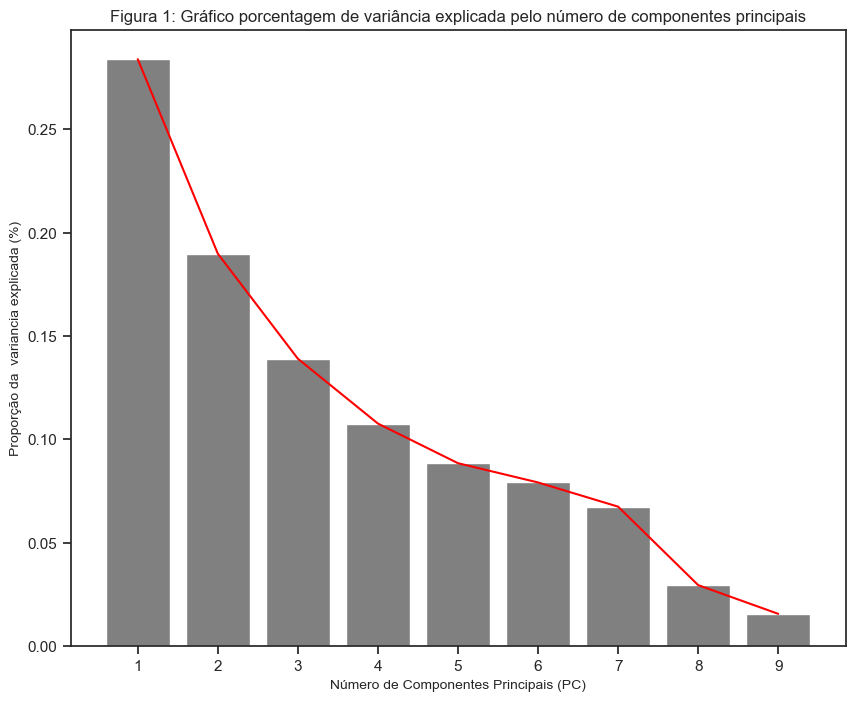

In [107]:
sns.set_theme(style = 'ticks')

PC = np.arange(pca.n_components_)+1
var = pca.explained_variance_ratio_

f, ax = plt.subplots(figsize=(10,8))

sns.barplot(x = PC, y = var, color = 'gray')
sns.lineplot(x = PC-1, y = var, color = 'red')

ax.set_xlabel('Número de Componentes Principais (PC)', fontsize = 10)
ax.set_ylabel('Proporção da  variancia explicada (%)', fontsize = 10)
ax.set_title('Figura 1: Gráfico porcentagem de variância explicada pelo número de componentes principais', fontsize = 12)

plt.show()

/private/tmp/PKInstallSandbox.QZdpJd/tmp/ipykernel_36992/3259076905.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = PC-1, y = autovalor, palette = 'viridis', markers=True, dashes=True)


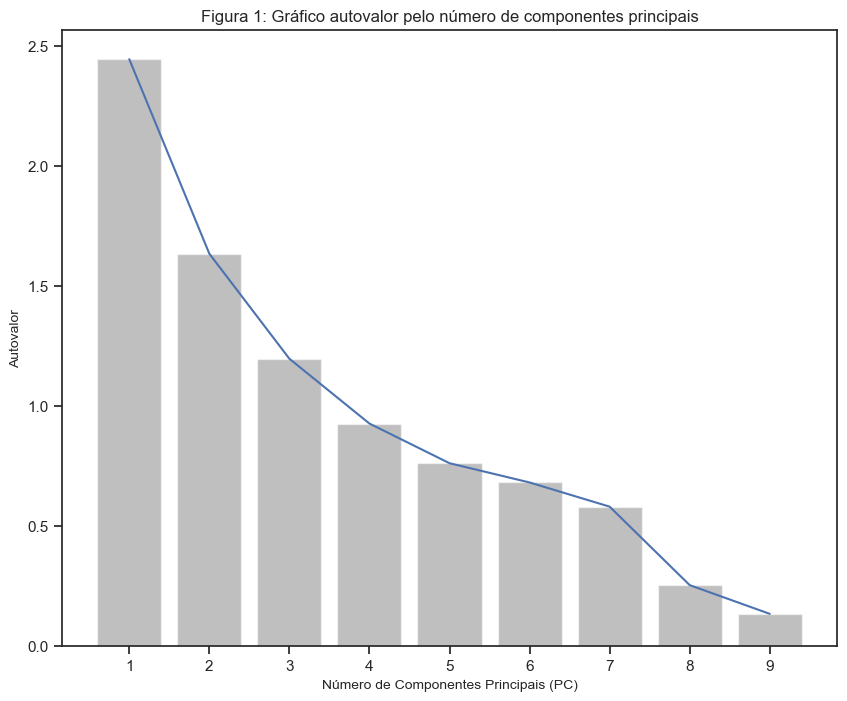

In [108]:
sns.set_theme(style = 'ticks')

PC = np.arange(pca.n_components_)+1
autovalor = pca.explained_variance_

f, ax = plt.subplots(figsize=(10,8))

sns.barplot(x = PC, y = autovalor, color = 'gray', alpha = 0.5)
sns.lineplot(x = PC-1, y = autovalor, palette = 'viridis', markers=True, dashes=True)

ax.set_xlabel('Número de Componentes Principais (PC)', fontsize = 10)
ax.set_ylabel('Autovalor', fontsize = 10)
ax.set_title('Figura 1: Gráfico autovalor pelo número de componentes principais', fontsize = 12)

plt.show()

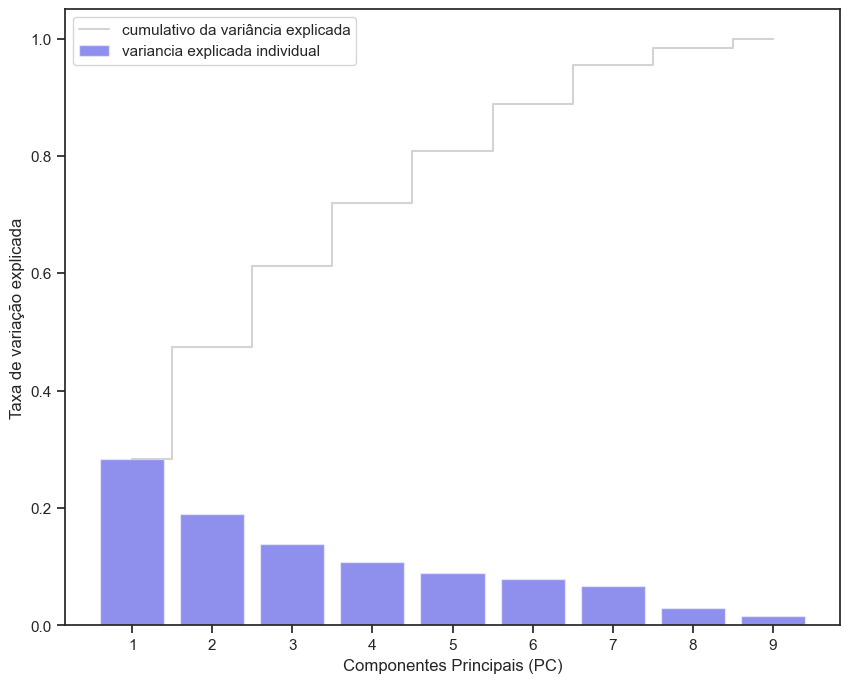

In [109]:
sns.set_theme(style='ticks')

f, ax = plt.subplots(figsize = (10,8))

PC = np.arange(pca.n_components_)+1
var = pca.explained_variance_ratio_
cum_var = np.cumsum(var)

sns.barplot(x= PC, y = var, alpha=0.5, label='variancia explicada individual', color = 'blue')
plt.step(x = PC-1, y = cum_var, where='mid',label='cumulativo da variância explicada', color = 'lightgray')

plt.ylabel('Taxa de variação explicada')
plt.xlabel('Componentes Principais (PC)')
plt.legend(loc='best')
plt.show()

In [110]:
pca_otimo = PCA(n_components=4)
df_pca = pca_otimo.fit_transform(x_teste)

In [111]:
df_pca_mineral = pd.DataFrame(data = df_pca, columns = ['PC1', 'PC2','PC3', 'PC4'])

display(df_pca_mineral.head(10))

,PC1,PC2,PC3,PC4
0,-0.216407,-1.893447,0.373202,-1.093371
1,-1.102768,-0.193848,0.830163,0.267958
2,-0.834164,1.853860,-1.054659,-1.238653
3,1.387954,-0.563503,-1.382621,-0.840001
4,0.043320,0.335376,-0.089071,0.358948
5,-1.343877,-0.573273,0.883814,0.211093
6,0.881093,-0.916206,-0.532733,0.153366
7,-0.165500,0.895158,-0.794005,1.166427
8,-0.304729,-0.376983,-0.233308,1.050779
9,0.498903,-0.447377,0.302360,-1.515161


In [112]:
estrutura = {0:'Indefinido', 1:'Triclinico', 2:'Monoclinico', 3:'Ortorombico', 4:'Tetragonal', 5:'Hexagonal', 6:'Trigonal', 7:'Cúbico'}

In [113]:
df_pca_mineral['Crystal Structure'] = y_teste.values
df_pca_mineral['Crystal Structure'] = df_pca_mineral['Crystal Structure'].map(estrutura)
df_pca_mineral.head(10)

,PC1,PC2,PC3,PC4,Crystal Structure
0,-0.216407,-1.893447,0.373202,-1.093371,Tetragonal
1,-1.102768,-0.193848,0.830163,0.267958,Ortorombico
2,-0.834164,1.853860,-1.054659,-1.238653,Triclinico
3,1.387954,-0.563503,-1.382621,-0.840001,Ortorombico
4,0.043320,0.335376,-0.089071,0.358948,Ortorombico
5,-1.343877,-0.573273,0.883814,0.211093,Hexagonal
6,0.881093,-0.916206,-0.532733,0.153366,Hexagonal
7,-0.165500,0.895158,-0.794005,1.166427,Monoclinico
8,-0.304729,-0.376983,-0.233308,1.050779,Triclinico
9,0.498903,-0.447377,0.302360,-1.515161,Ortorombico


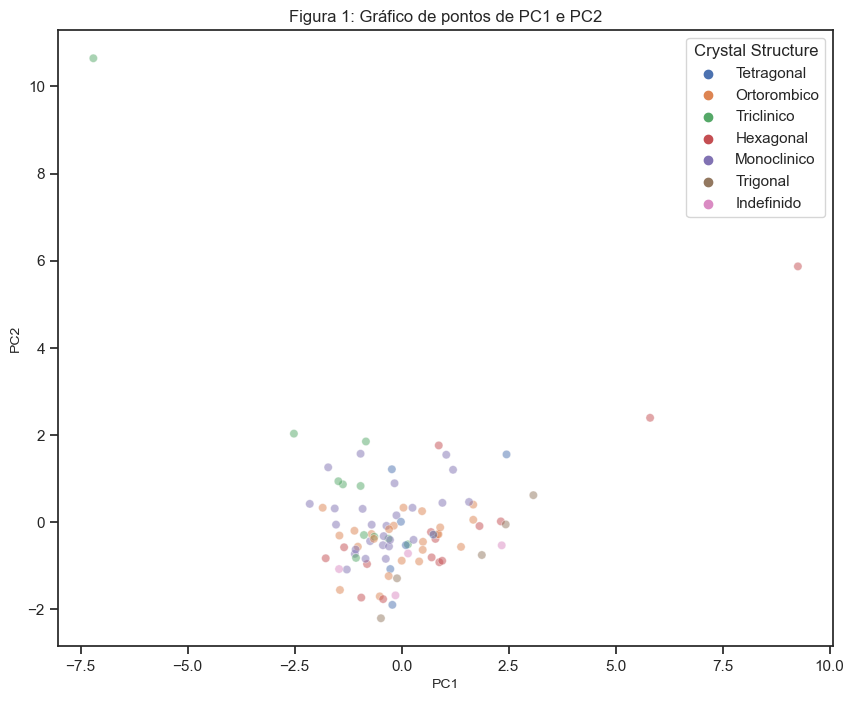

In [114]:
sns.set_theme(style= 'ticks')

f, ax = plt.subplots( figsize = (10,8))

sns.scatterplot(data = df_pca_mineral, x = 'PC1', y = 'PC2', hue = 'Crystal Structure', alpha = 0.5)

ax.set_xlabel('PC1', fontsize = 10)
ax.set_ylabel('PC2', fontsize = 10)
ax.set_title('Figura 1: Gráfico de pontos de PC1 e PC2', fontsize = 12)

plt.show()

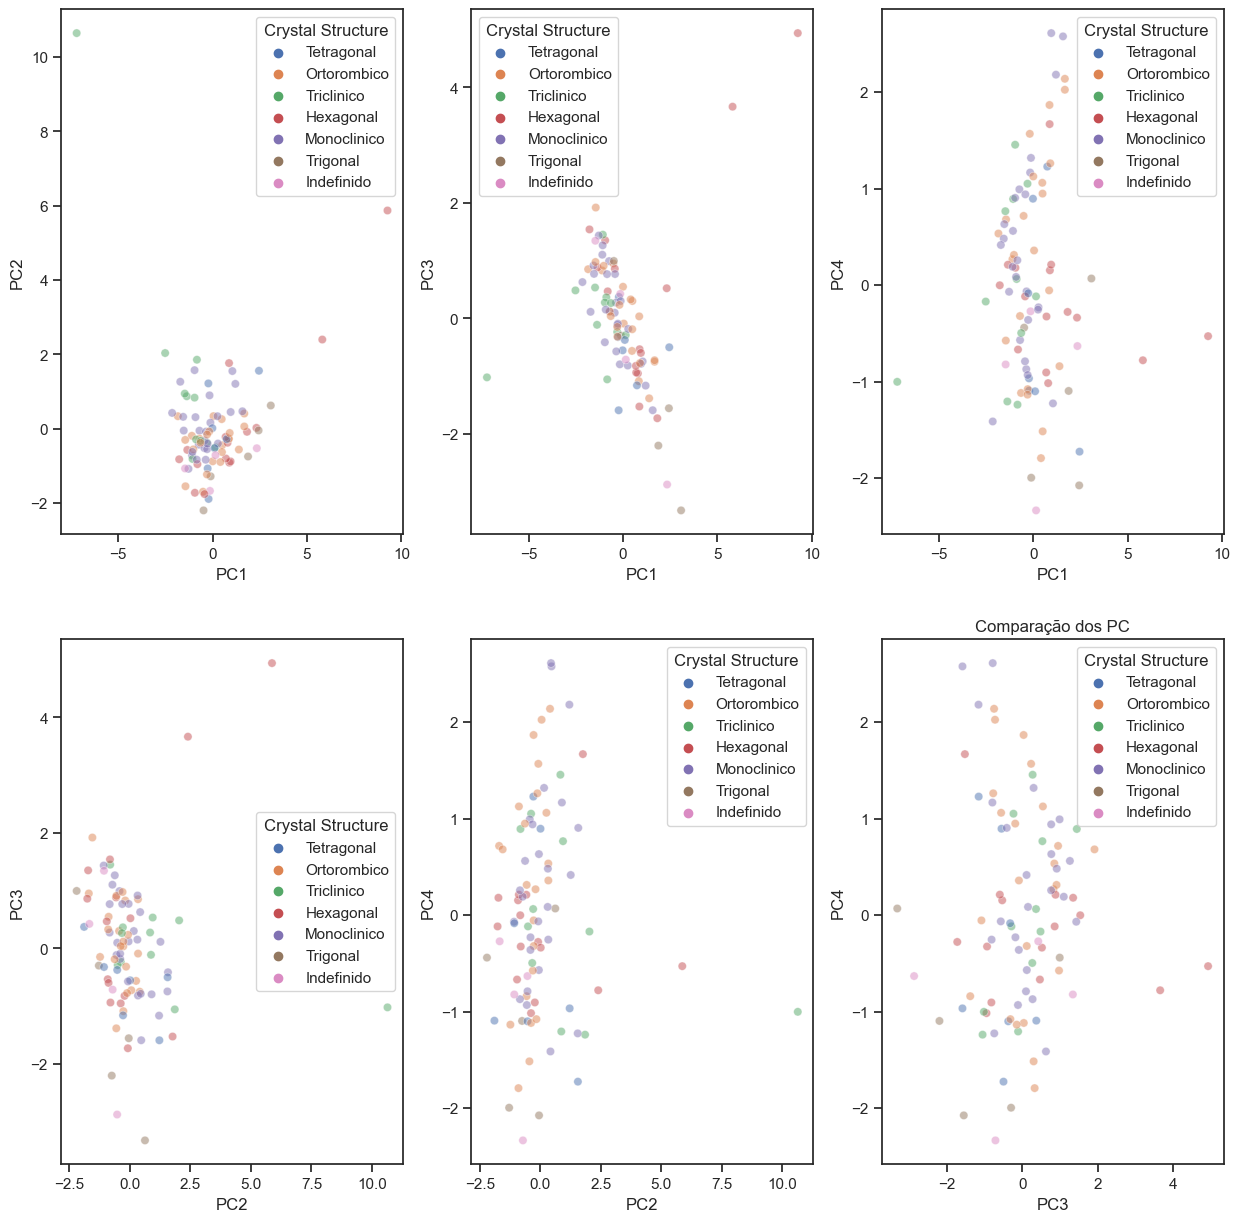

In [123]:
sns.set_theme(style= 'ticks')

f, ax = plt.subplots(2,3, figsize = (15,15))

sns.scatterplot(data = df_pca_mineral, x = 'PC1', y = 'PC2', hue = 'Crystal Structure', alpha = 0.5, ax=ax[0,0])
sns.scatterplot(data = df_pca_mineral, x = 'PC1', y = 'PC3', hue = 'Crystal Structure', alpha = 0.5, ax=ax[0,1])
sns.scatterplot(data = df_pca_mineral, x = 'PC1', y = 'PC4', hue = 'Crystal Structure', alpha = 0.5, ax=ax[0,2])
sns.scatterplot(data = df_pca_mineral, x = 'PC2', y = 'PC3', hue = 'Crystal Structure', alpha = 0.5, ax=ax[1,0])
sns.scatterplot(data = df_pca_mineral, x = 'PC2', y = 'PC4', hue = 'Crystal Structure', alpha = 0.5, ax=ax[1,1])
sns.scatterplot(data = df_pca_mineral, x = 'PC3', y = 'PC4', hue = 'Crystal Structure', alpha = 0.5, ax=ax[1,2])

plt.title('Comparação dos PC', fontsize = 12)

plt.show()

In [124]:
# biplot 
loadings = pca_otimo.components_ #coeficiente de correlação
n_features = pca_otimo.n_features_in_ #numero de features antes de PCA
features_names = df_treino.columns #nome das caolunas

#nomes do PC 
pc_list = [f'PC{i}' for i in list(range(1, n_features - 1))]

#associando os noems dos PC com os loagins
pc_loadings = dict(zip(pc_list, loadings))

loadigns_df = pd.DataFrame.from_dict(pc_loadings)
loadigns_df['features_names'] = features_names
loadigns_df = loadigns_df.set_index('features_names')

/Users/mmoliveira/anaconda3/envs/tcc_dsa23/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


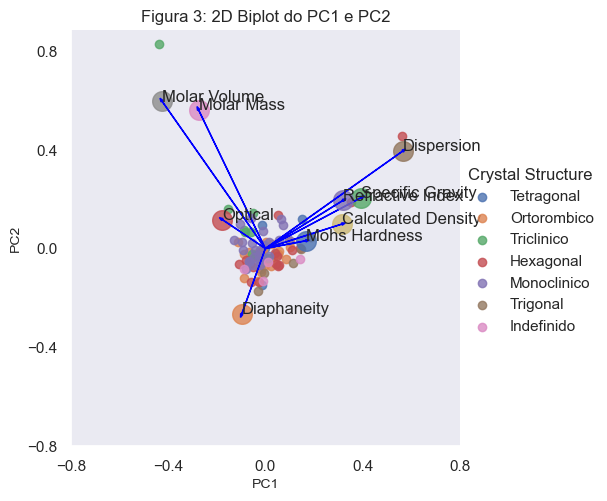

In [125]:
pca_df_scaled= df_pca_mineral.copy()

scaler_df = df_pca_mineral[['PC1', 'PC2']]
scaler = 1/ (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index]*=scaler[index]
    
#get de loadings
sns.set_theme(style = 'dark')
xs = loadings[0]
ys = loadings[1]

sns.lmplot(data = pca_df_scaled, x = 'PC1', y = 'PC2', hue = 'Crystal Structure', fit_reg=False)

for i, varnames in enumerate(features_names):
    plt.scatter(xs[i], ys[i], s= 200, alpha =0.8,)
    plt.arrow(0, 0, 
              xs[i],
              ys[i],
              color='blue',
              head_width = 0.01
              )
    plt.text(xs[i], ys[i], varnames)

ticks = np.linspace(-0.8, 0.8, num =5)
plt.xticks(ticks)
plt.yticks(ticks)

plt.xlabel('PC1', fontsize = 10)
plt.ylabel('PC2',  fontsize = 10)
plt.title('Figura 3: 2D Biplot do PC1 e PC2', fontsize = 12)

plt.show()

/Users/mmoliveira/anaconda3/envs/tcc_dsa23/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


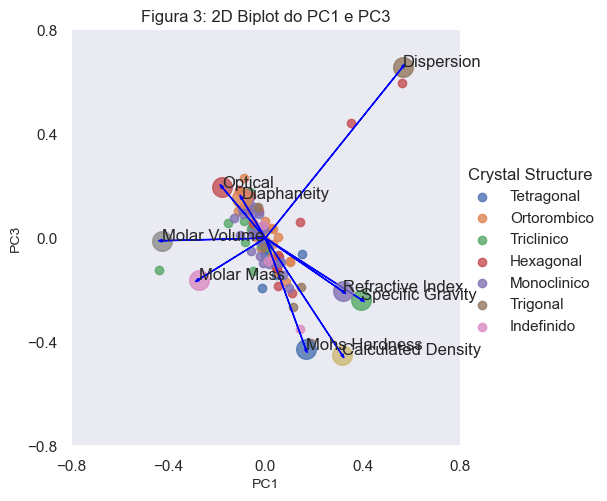

In [126]:
pca_df_scaled2= df_pca_mineral.copy()
scaler_df2 = df_pca_mineral[['PC1', 'PC3']]
scaler2 = 1/ (scaler_df2.max() - scaler_df2.min())

for index in scaler2.index:
    pca_df_scaled2[index]*=scaler2[index]
    
#get de loadings
sns.set_theme(style = 'dark')
xs = loadings[0]
ys = loadings[2]

sns.lmplot(data = pca_df_scaled2, x = 'PC1', y = 'PC3', hue = 'Crystal Structure', fit_reg=False)

for i, varnames in enumerate(features_names):
    plt.scatter(xs[i], ys[i], s= 200, alpha = 0.8)
    plt.arrow(0, 0, 
              xs[i],
              ys[i],
              color='blue',
              head_width = 0.01
              )
    plt.text(xs[i], ys[i], varnames)

ticks = np.linspace(-0.8, 0.8, num =5)
plt.xticks(ticks)
plt.yticks(ticks)

plt.xlabel('PC1', fontsize = 10)
plt.ylabel('PC3',  fontsize = 10)
plt.title('Figura 3: 2D Biplot do PC1 e PC3', fontsize = 12)

plt.show()

/Users/mmoliveira/anaconda3/envs/tcc_dsa23/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


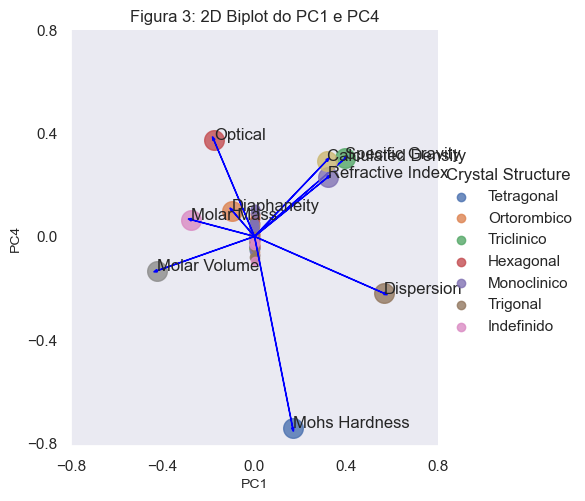

In [129]:
pca_df_scaled3= df_pca_mineral.copy()
scaler_df3 = df_pca_mineral[['PC1', 'PC4']]
scaler3 = 1/ (scaler_df3.max() - scaler_df3.min())

for index in scaler3.index:
    pca_df_scaled2[index]*=scaler3[index]
    
#get de loadings
sns.set_theme(style = 'dark')
xs = loadings[0]
ys = loadings[3]

sns.lmplot(data = pca_df_scaled2, x = 'PC1', y = 'PC4', hue = 'Crystal Structure', fit_reg=False)

for i, varnames in enumerate(features_names):
    plt.scatter(xs[i], ys[i], s= 200, alpha = 0.8)
    plt.arrow(0, 0, 
              xs[i],
              ys[i],
              color='blue',
              head_width = 0.01
              )
    plt.text(xs[i], ys[i], varnames)

ticks = np.linspace(-0.8, 0.8, num =5)
plt.xticks(ticks)
plt.yticks(ticks)

plt.xlabel('PC1', fontsize = 10)
plt.ylabel('PC4',  fontsize = 10)
plt.title('Figura 3: 2D Biplot do PC1 e PC4', fontsize = 12)

plt.show()

In [131]:
wcs = {}

for i in range (1, 9):
    kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 0)
    kmeans.fit(df_treino)
    wcs[i] = kmeans.inertia_

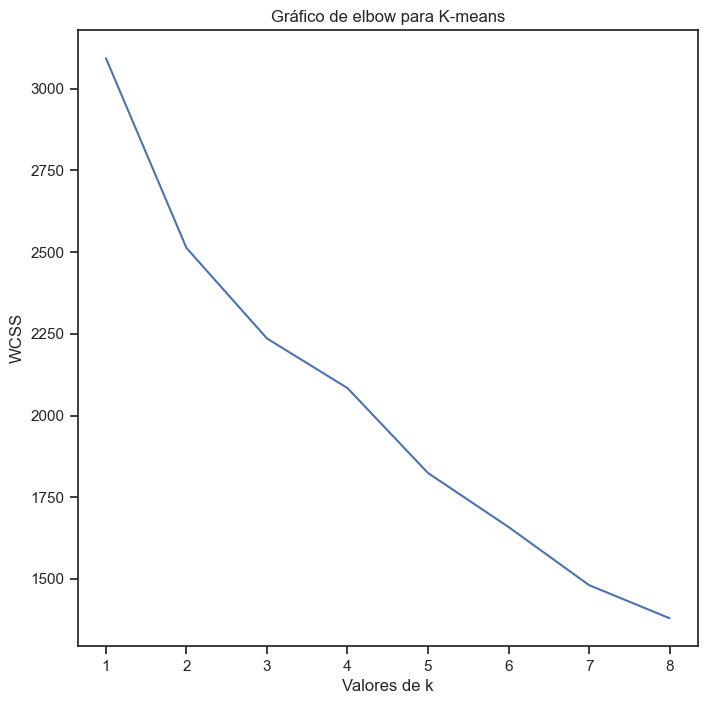

In [132]:
#Gráfico de elbow
sns.set_theme(style ='ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.lineplot(x = wcs.keys(), y = wcs.values())

ax.set(xlabel='Valores de k')
ax.set(ylabel= 'WCSS')
ax.set(title = 'Gráfico de elbow para K-means')

plt.show()

In [133]:
kmeans_pca = KMeans(n_clusters = 4, n_init='auto', random_state=0)
clusters = kmeans_pca.fit_predict(df_pca)

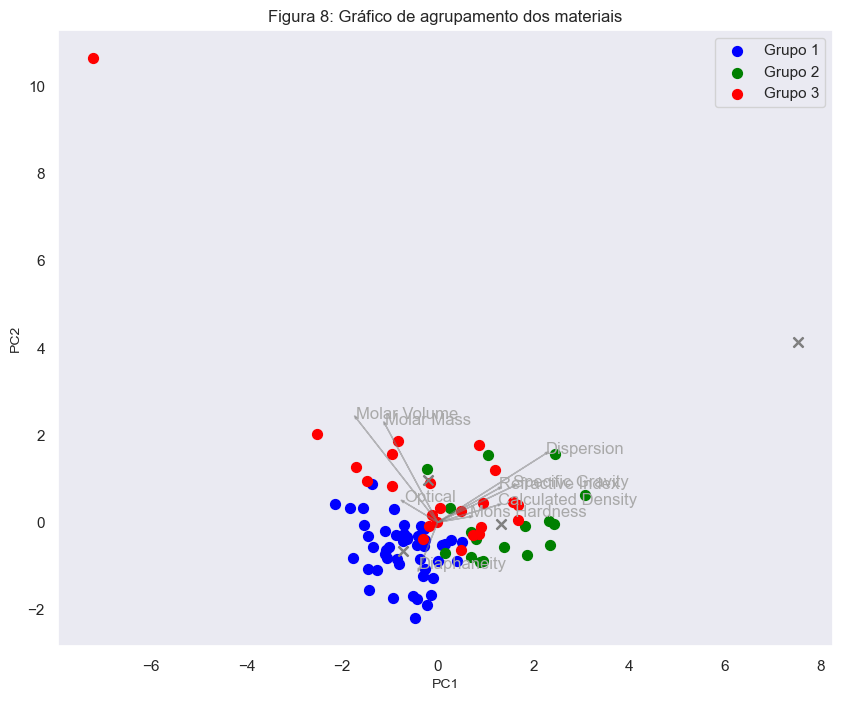

In [134]:
sns.set_theme(style='dark')

f, ax = plt.subplots(figsize = (10,8))

colors = ['blue', 'green', 'red']
xs = loadings[0]
ys = loadings[1]

for i in range(3):
    ds = df_pca[np.where(clusters == i)]
    plt.scatter(x= ds[:, 0], y = ds[:, 1], s=50, label = 'Grupo ' + str(i+1), color = colors[i])
    plt.scatter(x= kmeans_pca.cluster_centers_[:,0], y = kmeans_pca.cluster_centers_[:,1], color = 'gray', s = 50, marker='x')

for j, varnames in enumerate(features_names):
    plt.arrow(0, 0, xs[j]*4, ys[j]*4, color='gray', head_width = 0.05, alpha = 0.5)
    plt.text(xs[j]*4, ys[j]*4, varnames, color = 'darkgray')


ax.set_xlabel('PC1', fontsize = 10)
ax.set_ylabel('PC2', fontsize = 10)
ax.set_title('Figura 8: Gráfico de agrupamento dos materiais', fontsize=12)
plt.legend()

plt.show()

In [171]:
X = df[['Mohs Hardness', 'Diaphaneity', 'Specific Gravity', 'Optical', 'Refractive Index', 'Dispersion', 'Molar Mass', 'Molar Volume', 'Calculated Density']]
Y = df['Crystal Structure']

In [173]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42, stratify=Y)

In [174]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [194]:
#criando o random forest classifier
rf_mineral = RandomForestClassifier(n_estimators=1000, random_state=0)
rf_mineral.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [195]:
y_pred = rf_mineral.predict(x_test)

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [196]:
acuracia = accuracy_score(y_test, y_pred)
print('Acurácia:', acuracia)

Acurácia: 0.5274725274725275


In [197]:
feature_scores = pd.Series(rf_mineral.feature_importances_, index=df_treino.columns).sort_values(ascending=False)

In [198]:
print(feature_scores)

Optical               0.218581
Molar Volume          0.149260
Molar Mass            0.133994
Refractive Index      0.118885
Calculated Density    0.116068
Specific Gravity      0.112620
Mohs Hardness         0.109921
Diaphaneity           0.031676
Dispersion            0.008994
dtype: float64


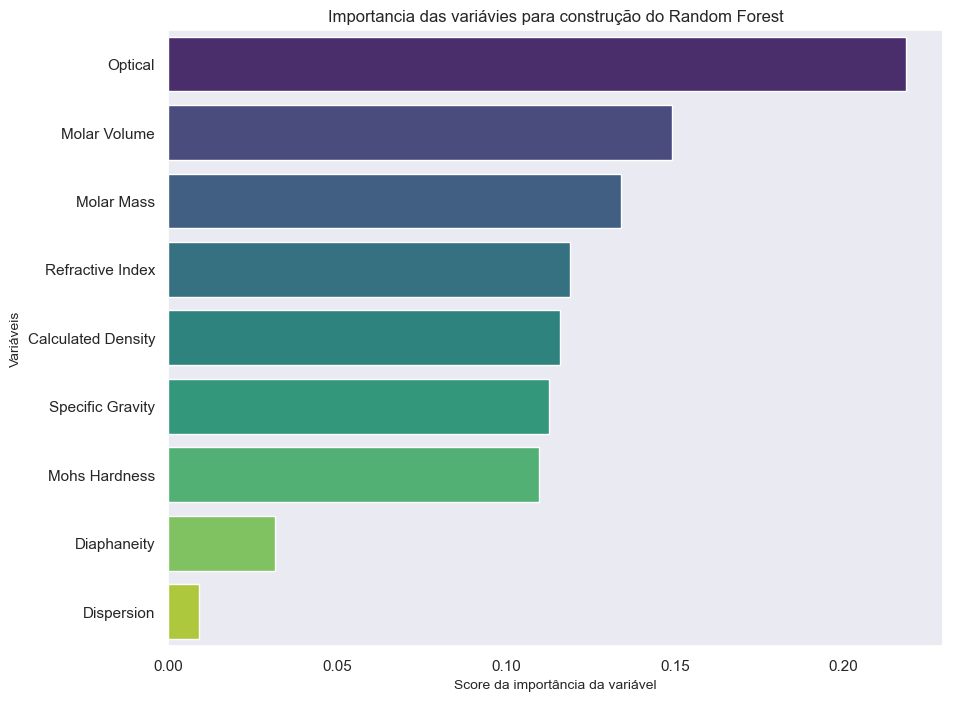

In [199]:
sns.set_theme(style = 'dark')

f, ax = plt.subplots(figsize = (10,8))

sns.barplot(x=feature_scores, y=feature_scores.index, palette ='viridis')

ax.set_xlabel('Score da importância da variável', fontsize = 10)
ax.set_ylabel('Variáveis', fontsize = 10)
ax.set_title("Importancia das variávies para construção do Random Forest", fontsize = 12)

plt.show()

In [200]:
matriz_confusao = confusion_matrix(y_test, y_pred)

display(matriz_confusao)

array([[ 0,  0,  0,  1,  0,  0,  2],
       [ 0,  2,  6,  3,  0,  0,  0],
       [ 0,  4, 23,  6,  0,  0,  0],
       [ 0,  0, 12,  7,  0,  0,  1],
       [ 0,  0,  1,  0,  2,  3,  0],
       [ 0,  0,  0,  0,  2, 12,  1],
       [ 1,  0,  0,  0,  0,  0,  2]])

In [201]:
from sklearn.metrics import classification_report

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.18      0.24        11
           2       0.55      0.70      0.61        33
           3       0.41      0.35      0.38        20
           4       0.50      0.33      0.40         6
           5       0.80      0.80      0.80        15
           6       0.33      0.67      0.44         3

    accuracy                           0.53        91
   macro avg       0.42      0.43      0.41        91
weighted avg       0.51      0.53      0.51        91

